1) Calcular el área de la superficie $z=9-x^2-y^2$ comprendida entre los planos $z=1$ y $z=5$. 



https://personales.unican.es/alvareze/CalculoWeb/CalculoII/practicas/PR6_Superficies_19_20.pdf

La parametrización de la superficie es:
$$
\begin{array}{l}
x=r\cos(v)\\y=r\sin(v)\\z=9-r^2
\end{array}
$$
con $2\le r \le 2\sqrt{2}$, $0\le v \le 2 \pi$



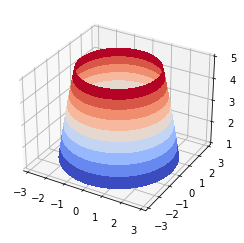

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
r=np.linspace(2,2*np.sqrt(2),10)
v=np.linspace(0,2*np.pi)
R,V=np.meshgrid(r,v)
X=R*np.cos(V);Y=R*np.sin(V)
Z=9-R**2

fig1, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()


Puesto que la superficie está definida por $z=4-x^2-y^2$, $z=g(x,y)$ el área es

$$
A= \int\int_S dS= \int \int_D \sqrt{g_x^2+ g_y^2 + 1} dx\, dy  
$$

donde 

$D=\{ (x,y)\in \mathbb{R}^2 \, / \, 2\le x^2+y^2\le 2 \sqrt{2} \}$


Pasando a coordenadas polares:

$$
A= \int_0^{2\pi}\int_2^{2\sqrt{2}} \sqrt{1+4r^2}\, r \, dr d\theta
$$

In [2]:
import sympy as sp
x,y=sp.symbols('x,y')
g=4-x**2-y**2
dg=[sp.diff(g,k) for k in [x,y]]
f=sp.sqrt(dg[0]**2+ dg[1]**2+1)
r,th=sp.symbols('r,th')
f=f.subs([ (x,r*sp.cos(th)),(y,r*sp.sin(th))])
f=f.simplify()
f=f*r

A=sp.integrate(f,(r,2,2*sp.sqrt(2)),(th,0,2*sp.pi))
print("Area= ", A.evalf())


Area=  62.5584149734665


2) Calcular el área de la superficie del sólido $z\le 9-x^2-y^2$ comprendida entre los planos $z=1$ y $z=5$. 

Nótese que en esta caso se incluyen las tapas

Si $z=1$:  $1=9-x^2-y^2$, entonces: $x^2+y^2=8$

Si $z=5$:  $5=9-x^2-y^2$, entonces: $x^2+y^2=4$

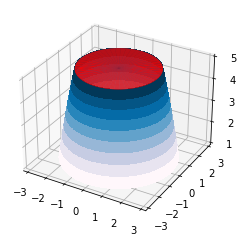

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
r=np.linspace(2,2*np.sqrt(2),10)
v=np.linspace(0,2*np.pi)
R,V=np.meshgrid(r,v)
X=R*np.cos(V);Y=R*np.sin(V)
Z=9-R**2

fig1, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.PuBu,linewidth=0, antialiased=False)

r=np.linspace(0,np.sqrt(8))
th=np.linspace(0,2*np.pi)
R,Th=np.meshgrid(r,th)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=1*np.ones_like(X)

surf = ax.plot_surface(X, Y, Z, cmap=cm.summer,linewidth=2)

r=np.linspace(0,2)
th=np.linspace(0,2*np.pi)
R,Th=np.meshgrid(r,th)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=5*np.ones_like(X)

surf = ax.plot_surface(X, Y, Z, cmap=cm.autumn,linewidth=2)


plt.show()

La superficie está formada por tres superficies, por tanto, es la suma de tres áreas. 
$$
A=A_1+A_2+A_3
$$

$S_1$: tapa superior.Circunferencia de radio $2$, por tanto, su área es $A_1=\pi r^2= \pi 2^2= 4\pi$
$S_3$: tapa inferior. Circunferencia de radio $2\sqrt{2}$, por tanto, su área es, $A_3=\pi r^2= \pi (2\sqrt{1})^2=8\pi$


$S_3$: superficie $z=4-x^2-y^2$ Puesto que la superficie está definida por $z=4-x^2-y^2$, $z=g(x,y)$ el área es

$$
A= \int\int_S dS= \int \int_D \sqrt{g_x^2+ g_y^2 + 1} dx\, dy  
$$

donde 

$D=\{ (x,y)\in \mathbb{R}^2 \, / \, 2\le x^2+y^2\le 2 \sqrt{2} \}$


Pasando a coordenadas polares:

$$
A= \int_0^{2\pi}\int_2^{2\sqrt{2}} \sqrt{1+4r^2}\, r \, dr d\theta
$$

In [8]:
import sympy as sp
x,y=sp.symbols('x,y')
g=4-x**2-y**2
dg=[sp.diff(g,k) for k in [x,y]]
f=sp.sqrt(dg[0]**2+ dg[1]**2+1)
r,th=sp.symbols('r,th')
f=f.subs([ (x,r*sp.cos(th)),(y,r*sp.sin(th))])
f=f.simplify()
f=f*r

A=sp.integrate(f,(r,2,2*sp.sqrt(2)),(th,0,2*sp.pi))
print("Area= ", A.evalf())
#aux=A+sp.pi*2**2+ sp.pi*8**2
#print("aux=", aux.evalf())
A=A.evalf()
print(A)
for r in [2,8]:
    A+=sp.pi*r**2
    A=A.evalf()
    print(A)
print("Area total= ",A)


Area=  62.5584149734665
aux= 276.186715417572
62.5584149734665
75.1247855878256
276.186715417572
Area total=  276.186715417572


Consideraamos el sólido de hierro fundido, determinado por la superficie $S$. La temperatura en cada punto $(x,y,z)$ en una región del sólido viene dada por la expresión $T(x,y,z)=(x^2+y^2)z^2$. Dado que la conductividad términa del hierro fundido es $55$, encuentra el flujo de calor a traves del límite del sólio si dicho límite está orientado hacia fuera. 

(a) Resolverlo directamente calculando las integrales de superficie

(b) Resolverlo aplicando el Teorema de Green

Si $T(x,y,z)$ es la función temeperatura

El flujo de calor es un campo vectorial proporcional al gradiente de la temperatura negativa: $F= -k \nabla T$, donde $k$ es la constante de conductividad términa de la sustancia a partir de la cual está hecho el objeto.

La tasa de flujo de calor a través de la superficie $S$ es

$$
\int \int_S F\cdot dS= \int \int_S -k \nabla T \cdot dS= \int \int_S -k \nabla T \cdot n \,dS 
$$

$n$: normal exterior unitario